In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import binary_erosion, binary_dilation
from scipy.misc import imread, imshow
%matplotlib inline

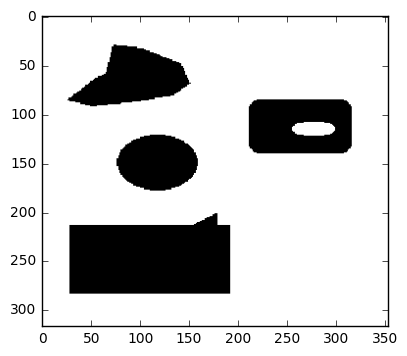

In [17]:
image = imread('data/image.png', flatten=True)
image = np.array([np.array([True if pix == 0.0 else False for pix in line])
                  for line in image])
plt.imshow(image, cmap='Greys')

In [15]:
def build_skeleton(input, structure):
    def is_empty(y):
        for line in y:
            for pix in line:
                if pix is False:
                    return True
        return False
    n, y1 = 0, input
    S, iter = [], 0
    while True:
        y2 = binary_erosion(y1, structure)
        if is_empty(y2) or iter == 10000:
            S.append(y1)
            return S
        y3 = binary_dilation(y2, structure)
        S.append(y1 - y3)
        n, y1 = n + 1, y2
        iter += 1

/home/rustam/Desktop/Python/Digital-images-processing-fundamentals/venv/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


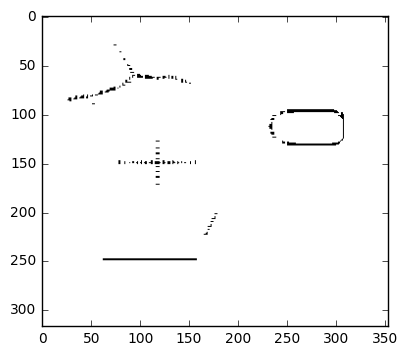

In [18]:
structure = np.array([np.ones(5, dtype=np.bool) for _ in range(5)])
S = build_skeleton(image, structure)
plt.imshow(sum(S), cmap='Greys')